In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import r2_score


# data_dir = "/kaggle/input/cbbl-recruitment-semester-2-regression"
data_dir = "."
random_state = 42

# Data Processing

In [2]:
train_df = pd.read_csv(f"{data_dir}/train.csv")
train_df

ID     Material Type   Shape Coat/Functional Group  \
0      472           Pt    I  Sphere                   PVP   
1      232           Au    I  Sphere                   CYS   
2     2041   EudragitRL    O  Sphere                   NaN   
3      437           Au    I  Sphere               Citrate   
4       68          SLN    O  Sphere                   NaN   
...    ...          ...  ...     ...                   ...   
1770   611    Dendrimer    O  Sphere                   C12   
1771   479          ZnO    I  Sphere                   NaN   
1772   732          C70    C  Sphere                   NaN   
1773  1184  Polystyrene    O  Sphere                  COOH   
1774   879           Pt    I  Sphere                   NaN   

                   Synthesis_Method Surface_Charge Cell_Type  \
0                Chemical Reduction       Negative     IMR90   
1                Chemical Reduction       Negative      L929   
2     Emulsion-Solvent Evaporation        Positive     THP-1   
3                Chemical Reduction       Negative    Jurkat   
4     Emulsion-Solvent Evaporation        Negative      A549   
...                             ...            ...       ...   
1770                     Commercial       Positive      hNPC   
1771                     Commercial       Positive     HCMEC   
1772                     Commercial       Negative       V79   
1773                     Commercial       Negative      HeLa   
1774                Green Synthesis       Negative    HEK293   

      No_of_Cells (cells/well) Human_Animal  ... Cell_Morphology   Cell_Age  \
0                       5000.0            H  ...      Fibroblast      Adult   
1                       5000.0            A  ...      Fibroblast      Adult   
2                       5000.0            H  ...        Monocyte      Adult   
3                     500000.0            H  ...     Lymphoblast      Adult   
4                     100000.0            H  ...      Epithelial      Adult   
...                        ...          ...  ...             ...        ...   
1770                  100000.0            H  ...        Neuronal  Embryonic   
1771                   50000.0            H  ...      Epithelial      Adult   
1772                   10000.0            A  ...      Fibroblast      Adult   
1773                    5000.0            H  ...      Epithelial      Adult   
1774                   10000.0            H  ...      Epithelial  Embryonic   

     Cell Line_Primary Cell Time (hr) Concentration (ug/ml)          Test  \
0                         L        24                  25.0  CellTiterGlo   
1                         L        24                  50.0           MTT   
2                         L        24                  25.0           MTT   
3                         L        24                   1.5           MTT   
4                         L        24                3671.1           NRU   
...                     ...       ...                   ...           ...   
1770                      P        72                   1.0           MTT   
1771                      P        12                   0.1           MTT   
1772                      L        24                   5.0           MTT   
1773                      L        48                   5.0         CCK-8   
1774                      L        24                 180.0           MTS   

        Test_Indicator    Size   Zeta   Target  
0     LuciferaseEnzyme    4.00  -8.00   98.293  
1      TetrazoliumSalt   25.76 -46.80   90.476  
2      TetrazoliumSalt  142.00  56.00  123.470  
3      TetrazoliumSalt    7.00 -99.00   89.391  
4      TetrazoliumSalt   98.40 -14.60   29.601  
...                ...     ...    ...      ...  
1770   TetrazoliumSalt    4.50  54.47  110.620  
1771   TetrazoliumSalt   45.30  32.70  100.330  
1772   TetrazoliumSalt   57.00 -35.00   92.898  
1773   TetrazoliumSalt   50.00  -9.00  105.980  
1774   TetrazoliumSalt   24.60 -11.00   83.900  

[1775 rows x 22 columns]

In [3]:
test_df = pd.read_csv(f"{data_dir}/test.csv")
X_test = test_df.iloc[:, 1:]
X_test

Material Type      Shape Coat/Functional Group  \
0          Ag    I     Sphere               Citrate   
1    Chitosan    O  Irregular                   NaN   
2         NiO    I     Sphere                   NaN   
3        TiO2    I     Sphere                   NaN   
4    Chitosan    O  Irregular                   NaN   
..        ...  ...        ...                   ...   
757        Au    I     Sphere                   CYS   
758     MWCNT    C   Nanotube                   NaN   
759      PLGA    O     Sphere              Chitosan   
760       C60    C     Sphere               Dextran   
761        Ag    I     Sphere              Liposome   

                  Synthesis_Method Surface_Charge Cell_Type  \
0                       Commercial       Negative   CCL-110   
1       Ionotropic Gelation Method       Positive      MBMC   
2                       Commercial       Positive     HepG2   
3                       Commercial       Negative      A549   
4       Ionotropic Gelation Method       Positive      MBMC   
..                             ...            ...       ...   
757             Chemical Reduction       Negative      L929   
758                     Commercial        Neutral     HUVEC   
759  Emulsion-Solvent Evaporation        Positive  Colo_205   
760                     Commercial       Negative        C6   
761             Chemical Reduction       Negative     THP-1   

     No_of_Cells (cells/well) Human_Animal Cell_Source  \
0                        5000            H       Human   
1                       10000            A       Mouse   
2                       10000            H       Human   
3                       30000            H       Human   
4                       10000            A       Mouse   
..                        ...          ...         ...   
757                      5000            A       Mouse   
758                     40000            H       Human   
759                     10000            H       Human   
760                     10000            A         Rat   
761                     10000            H       Human   

                      Cell_Tissue Cell_Morphology   Cell_Age  \
0                            Skin      Fibroblast      Fetus   
1                      BoneMarrow         Spindle      Adult   
2                           Liver      Epithelial      Adult   
3                            Lung      Epithelial      Adult   
4                      BoneMarrow         Spindle      Adult   
..                            ...             ...        ...   
757  SubcutaneousConnectiveTissue      Fibroblast      Adult   
758                Umbilical Vein     Endothelial  Embryonic   
759                         Colon      Epithelial      Adult   
760                         Brain      Fibroblast      Adult   
761                         Blood        Monocyte      Adult   

    Cell Line_Primary Cell  Time (hr)  Concentration (ug/ml)        Test  \
0                        P         24                   0.50         MTS   
1                        P         72                  31.25         MTT   
2                        L         24                 100.00         MTS   
3                        L         48                  10.00         MTT   
4                        P         24                1000.00         MTT   
..                     ...        ...                    ...         ...   
757                      L         24                   5.00         MTT   
758                      P         24                  32.00         NRU   
759                      L         24                1250.00         MTS   
760                      L         24                  25.00         MTT   
761                      L         24                   5.00  AlamarBlue   

      Test_Indicator    Size  Zeta  
0    TetrazoliumSalt   39.94 -23.5  
1    TetrazoliumSalt  475.20  71.3  
2    TetrazoliumSalt   21.60  25.3  
3    TetrazoliumSalt   81.80  -8.6  
4    TetrazoliumSalt  3

## Data Cleaning

In [4]:
def plot_distribution(data, column, title) -> None:

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)

    sns.histplot(data[column], kde=True, bins=30)
    plt.title(f"Distribution of {title}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)

    plt.subplot(1, 2, 2)
    sns.boxplot(x=column, data=data)
    plt.title(f"Boxplot of {title}")
    plt.xlabel("Coat/Functional Group")
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()


def handle_outliers(data, column, method) -> pd.DataFrame:
    """
    Handles outliers in the specified column using the given method.
    """
    if method == "drop":
        return data[data[column].between(data[column].quantile(0.05), data[column].quantile(0.95))]
    elif method == "clip":
        Q1 = train_df["Target"].quantile(0.25)
        Q3 = train_df["Target"].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[column] = data[column].clip(lower_bound, upper_bound)
        return data
    elif method == "zscore":
        z_scores = (data[column] - data[column].mean()) / data[column].std()
        return data[(z_scores > -3) & (z_scores < 3)]
    else:
        raise ValueError("Invalid outlier handling method specified.")

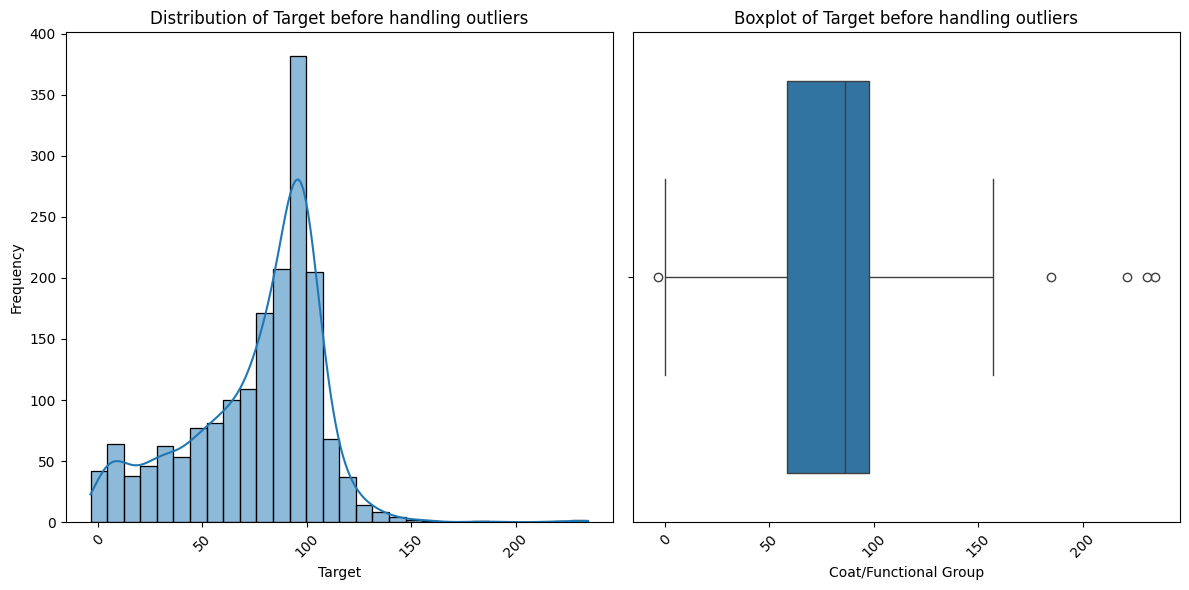

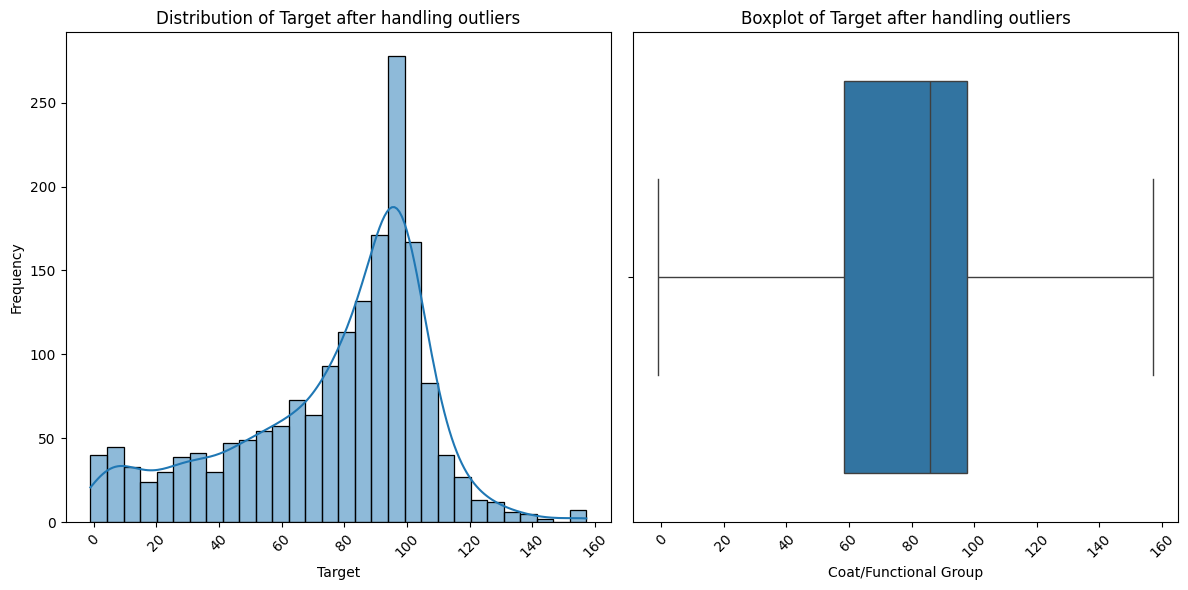

ID     Material Type   Shape Coat/Functional Group  \
0      472           Pt    I  Sphere                   PVP   
1      232           Au    I  Sphere                   CYS   
2     2041   EudragitRL    O  Sphere                   NaN   
3      437           Au    I  Sphere               Citrate   
4       68          SLN    O  Sphere                   NaN   
...    ...          ...  ...     ...                   ...   
1770   611    Dendrimer    O  Sphere                   C12   
1771   479          ZnO    I  Sphere                   NaN   
1772   732          C70    C  Sphere                   NaN   
1773  1184  Polystyrene    O  Sphere                  COOH   
1774   879           Pt    I  Sphere                   NaN   

                   Synthesis_Method Surface_Charge Cell_Type  \
0                Chemical Reduction       Negative     IMR90   
1                Chemical Reduction       Negative      L929   
2     Emulsion-Solvent Evaporation        Positive     THP-1   
3                Chemical Reduction       Negative    Jurkat   
4     Emulsion-Solvent Evaporation        Negative      A549   
...                             ...            ...       ...   
1770                     Commercial       Positive      hNPC   
1771                     Commercial       Positive     HCMEC   
1772                     Commercial       Negative       V79   
1773                     Commercial       Negative      HeLa   
1774                Green Synthesis       Negative    HEK293   

      No_of_Cells (cells/well) Human_Animal  ... Cell_Morphology   Cell_Age  \
0                       5000.0            H  ...      Fibroblast      Adult   
1                       5000.0            A  ...      Fibroblast      Adult   
2                       5000.0            H  ...        Monocyte      Adult   
3                     500000.0            H  ...     Lymphoblast      Adult   
4                     100000.0            H  ...      Epithelial      Adult   
...                        ...          ...  ...             ...        ...   
1770                  100000.0            H  ...        Neuronal  Embryonic   
1771                   50000.0            H  ...      Epithelial      Adult   
1772                   10000.0            A  ...      Fibroblast      Adult   
1773                    5000.0            H  ...      Epithelial      Adult   
1774                   10000.0            H  ...      Epithelial  Embryonic   

     Cell Line_Primary Cell Time (hr) Concentration (ug/ml)          Test  \
0                         L        24                  25.0  CellTiterGlo   
1                         L        24                  50.0           MTT   
2                         L        24                  25.0           MTT   
3                         L        24                   1.5           MTT   
4                         L        24                3671.1           NRU   
...                     ...       ...                   ...           ...   
1770                      P        72                   1.0           MTT   
1771                      P        12                   0.1           MTT   
1772                      L        24                   5.0           MTT   
1773                      L        48                   5.0         CCK-8   
1774                      L        24                 180.0           MTS   

        Test_Indicator    Size   Zeta   Target  
0     LuciferaseEnzyme    4.00  -8.00   98.293  
1      TetrazoliumSalt   25.76 -46.80   90.476  
2      TetrazoliumSalt  142.00  56.00  123.470  
3      TetrazoliumSalt    7.00 -99.00   89.391  
4      TetrazoliumSalt   98.40 -14.60   29.601  
...                ...     ...    ...      ...  
1770   TetrazoliumSalt    4.50  54.47  110.620  
1771   TetrazoliumSalt   45.30  32.70  100.330  
1772   TetrazoliumSalt   57.00 -35.00   92.898  
1773   TetrazoliumSalt   50.00  -9.00  105.980  
1774   TetrazoliumSalt   24.60 -11.00   83.900  

[1775 rows x 22 columns]

In [5]:
# Plotting the distribution of the Target column in Histogram and Boxplot before handling outliers
plot_distribution(train_df, "Target", "Target before handling outliers")

# Using the most frequent category for 'Target' as a simple handling outliers") method.
train_df = handle_outliers(train_df, "Target", "clip")

# Plotting the distribution of the Target column in Histogram and Boxplot after handling outliers.
plot_distribution(train_df, "Target", "Target after handling outliers")

train_df

In [6]:
X_train, y_train = train_df.iloc[:, 1:-1], train_df.iloc[:, -1]
X_train.shape, y_train.shape

((1775, 20), (1775,))

## Feature Encoding

In [7]:
cat_cols = X_train.select_dtypes(include=["object"]).columns.tolist()
encoder = LabelEncoder()

for cols in cat_cols:
    X_train[cols] = encoder.fit_transform(X_train[cols])
    X_test[cols] = encoder.transform(X_test[cols])

In [8]:
X_train

Material  Type  Shape  Coat/Functional Group  Synthesis_Method  \
0           20     1      6                     23                 1   
1            2     1      6                      4                 1   
2           11     2      6                     31                 6   
3            2     1      6                      6                 1   
4           21     2      6                     31                 6   
...        ...   ...    ...                    ...               ...   
1770         9     2      6                      1                 4   
1771        25     1      6                     31                 4   
1772         4     0      6                     31                 4   
1773        19     2      6                      2                 4   
1774        20     1      6                     31                 9   

      Surface_Charge  Cell_Type  No_of_Cells (cells/well)  Human_Animal  \
0                  0         26                    5000.0             1   
1                  0         31                    5000.0             0   
2                  2         46                    5000.0             1   
3                  0         28                  500000.0             1   
4                  0          4                  100000.0             1   
...              ...        ...                       ...           ...   
1770               2         53                  100000.0             1   
1771               2         14                   50000.0             1   
1772               0         49                   10000.0             0   
1773               0         24                    5000.0             1   
1774               0         18                   10000.0             1   

      Cell_Source  Cell_Tissue  Cell_Morphology  Cell_Age  \
0               2           15                2         0   
1               4           22                2         0   
2               2            2                7         0   
3               2            2                5         0   
4               2           15                1         0   
...           ...          ...              ...       ...   
1770            2            4               10         1   
1771            2           12                1         0   
1772            1           15                2         0   
1773            2            6                1         0   
1774            2           13                1         1   

      Cell Line_Primary Cell  Time (hr)  Concentration (ug/ml)  Test  \
0                          0         24                   25.0     3   
1                          0         24                   50.0     8   
2                          0         24                   25.0     8   
3                          0         24                    1.5     8   
4                          0         24                 3671.1     9   
...                      ...        ...                    ...   ...   
1770                       1         72                    1.0     8   
1771                       1         12                    0.1     8   
1772                       0         24                    5.0     8   
1773                       0         48                    5.0     1   
1774                       0         24                  180.0     7   

      Test_Indicator    Size   Zeta  
0                  4    4.00  -8.00  
1                  7   25.76 -46.80  
2                  7  142.00  56.00  
3                  7    7.00 -99.00  
4                  7   98.40 -14.60  
...              ...     ...    ...  
1770               7    4.50  54.47  
1771               7   45.30  32.70  
1772               7   57.00 -35.00  
1773               7   50.00  -9.00  
1774               7   24.60 -11.00  

[1775 rows x 20 columns]

In [9]:
X_test

Material  Type  Shape  Coat/Functional Group  Synthesis_Method  \
0           0     1      6                      6                 4   
1           6     2      2                     31                11   
2          16     1      6                     31                 4   
3          24     1      6                     31                 4   
4           6     2      2                     31                11   
..        ...   ...    ...                    ...               ...   
757         2     1      6                      4                 1   
758        14     0      3                     31                 4   
759        17     2      6                      5                 6   
760         3     0      6                     12                 4   
761         0     1      6                     15                 1   

     Surface_Charge  Cell_Type  No_of_Cells (cells/well)  Human_Animal  \
0                 0         10                      5000             1   
1                 2         32                     10000             0   
2                 2         25                     10000             1   
3                 0          4                     30000             1   
4                 2         32                     10000             0   
..              ...        ...                       ...           ...   
757               0         31                      5000             0   
758               1         22                     40000             1   
759               2         13                     10000             1   
760               0          9                     10000             0   
761               0         46                     10000             1   

     Cell_Source  Cell_Tissue  Cell_Morphology  Cell_Age  \
0              2           20                2         2   
1              4            3               11         0   
2              2           14                1         0   
3              2           15                1         0   
4              4            3               11         0   
..           ...          ...              ...       ...   
757            4           22                2         0   
758            2           24                0         1   
759            2            7                1         0   
760            5            4                2         0   
761            2            2                7         0   

     Cell Line_Primary Cell  Time (hr)  Concentration (ug/ml)  Test  \
0                         1         24                   0.50     7   
1                         1         72                  31.25     8   
2                         0         24                 100.00     7   
3                         0         48                  10.00     8   
4                         1         24                1000.00     8   
..                      ...        ...                    ...   ...   
757                       0         24                   5.00     8   
758                       1         24                  32.00     9   
759                       0         24                1250.00     7   
760                       0         24                  25.00     8   
761                       0         24                   5.00     0   

     Test_Indicator    Size  Zeta  
0                 7   39.94 -23.5  
1                 7  475.20  71.3  
2                 7   21.60  25.3  
3                 7   81.80  -8.6  
4                 7  384.60  62.1  
..              ...     ...   ...  
757               7   25.76 -46.8  
758               5   17.60   0.9  
759               7  204.00  10.0  
760               7   30.00 -16.9  
761               0   82.73 -31.9  

[762 rows x 20 columns]

# Model Training

In [10]:
model = ExtraTreesRegressor(
    random_state=random_state,
    n_estimators=100,
    criterion="absolute_error",
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features="sqrt",
    max_leaf_nodes=None,
)
model.fit(X_train, y_train)

print("Training R2 Score: ", r2_score(y_train, model.predict(X_train)))

Training R2 Score:  0.7587580422465503


# Model Optimization

In [ ]:
param_grid = {
    "n_estimators": [100, 200],
    "criterion": ["absolute_error", "poisson", "squared_error"],
    "max_depth": [5, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "min_weight_fraction_leaf": [0.0, 0.1, 1.0],
    "max_features": ["sqrt", "log2", 1.0],
    "max_leaf_nodes": [None, 10, 20],
    "random_state": [random_state],
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='r2',
    n_jobs=-1,
    cv=5,
)

In [12]:
grid_search.fit(X_train, y_train)

best_model_class = grid_search.best_estimator_
best_score_class = grid_search.best_score_
print(f"Best Model Hyperparameters: {grid_search.best_params_}")
print(f"Best Model Score (R2): {best_score_class}")

# Store the best models (optional, but good practice)
# You can save these models using joblib or pickle
# Example using joblib:
# import joblib
# joblib.dump(best_model_class, 'best_random_forest_classifier.pkl')

Fitting 5 folds for each of 4374 candidates, totalling 21870 fits
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.1, n_estimators=100, random_state=42; total time=   0.8s
[CV] END criterion=absolute_error, max_depth=5, max_features=sqrt, max_leaf_nodes=

/home/theodore/miniconda3/envs/cbbl-2025/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
11178 fits failed out of a total of 21870.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
7290 fits failed with the following error:
Traceback (most recent call last):
  File "/home/theodore/miniconda3/envs/cbbl-2025/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/theodore/miniconda3/envs/cbbl-2025/lib/python3.11/site-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/home/theodore/miniconda3/envs/cbbl-2025/lib/python3.11/site-packages/sklearn/base.py", l

Best Model Hyperparameters: {'criterion': 'squared_error', 'max_depth': 20, 'max_features': 1.0, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'random_state': 42}
Best Model Score (R2): 0.7843937420489621


# Model Evaluation

In [13]:
result_df = pd.DataFrame(data={"ID": test_df.iloc[:, 0], "Target": model.predict(X_test)})
result_df.to_csv("submission.csv", index=False)

# !head submission.csv